## Supplementary Figure 12 of Breast cancer

In [1]:
import pandas as pd
import numpy as np

# !pip install scikit-image
from skimage import data
from skimage.filters import threshold_multiotsu
from skimage.filters import threshold_otsu
import sys
sys.path.append('../../source_code/')


from scGCO_source import *

import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3

#### input data as cell x genes, (cell as xxy location)

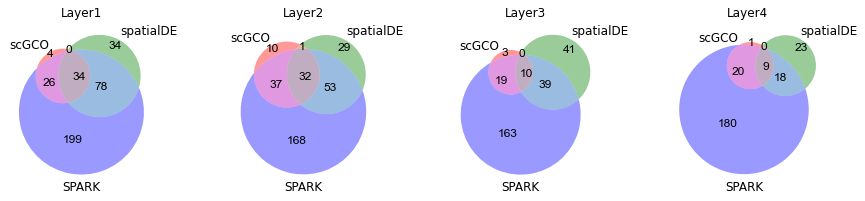

In [2]:
from ast import literal_eval
from matplotlib_venn import venn2,venn3

fig,axis=plt.subplots(1,4,figsize=(15,3))
fig.subplots_adjust(hspace=0.3, wspace=0.3) #,
                                #top=0.925, right=0.925, bottom=0.075, left = 0.075)
gco_genes=[]
gco_array=[]
gco_size=[]

de_genes=[]
de_array=[]
de_size=[]

spark_genes=[]
spark_array=[]
spark_size=[]

overlap_gco_array=[]
overlap_gco_size= []

overlap_de_array = []
overlap_de_size =[]

overlap_spark_array=[]
overlap_spark_size = []
nn=0

for j in range(1,5):
    result_df=read_result_to_dataframe('../../../results/BreastCancer/scGCO_results/BC{}_result_df.csv'.format(j))

    fdr_cut=0.05
    fdr_df_sct=result_df.loc[result_df.fdr< fdr_cut]
    count_gco=fdr_df_sct.index.values
    nn+= len(count_gco)
    gco_genes.extend(count_gco)
    gco_array.append(count_gco)
    gco_size.append(len(count_gco))

    spatialDE=pd.read_csv('../../../results/BreastCancer/SpatialDE_results/BC_{}_DE.csv'.format(j))
    count_de=spatialDE.g.values
    de_genes.extend(count_de)
    de_array.append(count_de)
    de_size.append(len(count_de))

    spark = pd.read_csv('../../../results/BreastCancer/SPARK_results/Layer{}_BC_spark.csv'.format(j))
    count_spark = spark.genes
    spark_genes.extend(count_spark)
    spark_array.append(count_spark)
    spark_size.append(len(count_spark))
    
    title='Layer'+str(j)
    y=(j-1)%4
   
    v=venn3(subsets=[set(count_gco),set(count_de),set(count_spark)],
            set_labels=['scGCO','spatialDE','SPARK'],
           ax=axis[y])
    axis[y].set_title(title)
    
    for text in v.subset_labels:
        text.set_fontsize(12)
        text.set_fontname('Arial')
        
    overlap_gco = (set(count_gco) & set(count_de)) |(set(count_gco) & set(count_spark))
    overlap_gco_array.append(overlap_gco)
    overlap_gco_size.append(len(overlap_gco))
    
    overlap_de = (set(count_de) & set(count_gco)) |(set(count_de) & set(count_spark))
    overlap_de_array.append(overlap_de)
    overlap_de_size.append(len(overlap_de))
    
    overlap_spark = (set(count_spark) & set(count_gco)) |(set(count_spark) & set(count_de))
    overlap_spark_array.append(overlap_spark)
    overlap_spark_size.append(len(overlap_spark))

plt.show()

In [4]:
fig.savefig('../../../results/Figure/Supple_Fig12a-BC_venn.pdf')

In [5]:
from scipy import stats
print(stats.ttest_ind(gco_size, de_size))

stats.ttest_ind(gco_size, spark_size)

Ttest_indResult(statistic=-2.055214079734988, pvalue=0.08562177704580513)


Ttest_indResult(statistic=-7.588214292542524, pvalue=0.0002724731396971941)

## MAD

In [6]:
from scipy import stats
mad1= stats.median_abs_deviation(gco_size)
print('scGCO MAD: ',mad1 )

mad2= stats.median_abs_deviation(de_size)
print('spatialDE MAD: ',mad2 )

mad3 = stats.median_abs_deviation(spark_size)
print('SPARK MAD: ',mad3 )

scGCO MAD:  17.0
spatialDE MAD:  28.0
SPARK MAD:  31.5


Text(0.5, 1.0, 'Breast Cancer with fdr05')

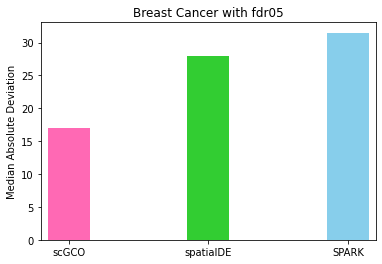

In [7]:
# plt.figure(figsize=(3,4))
x=[1,2,3]
xlabels= ['scGCO', 'spatialDE','SPARK']
y= [mad1, mad2, mad3]
color = ['hotpink', 'limegreen','skyblue']
plt.bar(x, y, width=0.3,color=color )
plt.xticks(x, xlabels)
plt.xlim([0.8,3.2])
plt.ylabel('Median Absolute Deviation')
plt.title('Breast Cancer with fdr05')


## Supplementary Fig 12b : Reproducibility

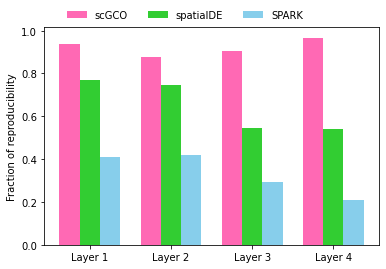

In [8]:
xlabel= ['Layer 1', 'Layer 2', 'Layer 3','Layer 4']
width=0.25
y_gco = [overlap_gco_size[i]/gco_size[i] for i in range(len(gco_size))]
y_de = [overlap_de_size[i]/de_size[i] for i in range(len(de_size))]
y_spark = [overlap_spark_size[i]/spark_size[i] for i in range(len(spark_size))]
colors = ['hotpink', 'limegreen','skyblue']
plt.bar(np.arange(len(y_gco)), y_gco,width=width, label='scGCO',color=colors[0] )
plt.bar(np.arange(len(y_de))+width, y_de,width=width, label='spatialDE',color=colors[1],tick_label=xlabel)
plt.bar(np.arange(len(y_spark))+ 2*width, y_spark,width=width, label='SPARK',color=colors[2])
plt.yticks(np.arange(0,1.1,0.2))
plt.ylabel('Fraction of reproducibility')
# plt.title('Breast Cancer with fdr05')
plt.legend(bbox_to_anchor = [0.8,1.12],ncol = 3, frameon=False)
plt.savefig('../../../results/Figure/Supple_Fig12b-BC.pdf')

In [9]:
print(np.mean(y_gco), np.std(y_gco))
print(np.mean(y_de), np.std(y_de))
print(np.mean(y_spark), np.std(y_spark))

0.9213541666666667 0.03424454412141201
0.6498484547680498 0.10785371023863295
0.3329014891639781 0.08788756503928145
